# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Making Predictions

In [8]:
def forward(x):
    y = w * x + b
    return y


tabulation = Form_Generator()
tabulation.heading_printer("Definition of prediction function")

definitions = ["""
def forward(x):
    y = w * x + b
    return y
"""]
tabulation.definition_generator(definitions)

Definition of prediction function

    +-------------------+
    | Definition        |
    +-------------------+
    | def forward(x):   |
    |     y = w * x + b |
    |     return y      |
    +-------------------+


In [9]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

tabulation = Form_Generator()
tabulation.heading_printer("Initial assignment of parameters")

statements = [
    """
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
"""
]
tabulation.statement_generator(statements)

variables = ["w", "b"]
values = [str(w), str(b)]
tabulation.variable_generator(variables, values)

Initial assignment of parameters

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | w = torch.tensor(3.0, requires_grad=True) |
    | b = torch.tensor(1.0, requires_grad=True) |
    +-------------------------------------------+
    +----------+--------------------------------+
    | Variable | Value                          |
    +----------+--------------------------------+
    | w        | tensor(3., requires_grad=True) |
    | b        | tensor(1., requires_grad=True) |
    +----------+--------------------------------+


In [10]:
x = torch.tensor(2)

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with 0D tensor")

statements = ["x = torch.tensor(2)"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with 0D tensor

    +---------------------+
    | Statement           |
    +---------------------+
    | x = torch.tensor(2) |
    +---------------------+
    +----------+-----------+
    | Variable | Value     |
    +----------+-----------+
    | x        | tensor(2) |
    +----------+-----------+
    +------------+------------------------------------+
    | Expression | Result                             |
    +------------+------------------------------------+
    | forward(x) | tensor(7., grad_fn=⟨AddBackward0⟩) |
    +------------+------------------------------------+


In [11]:
x = torch.tensor([[4], [7]])

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with multi-D tensor")

statements = ["x = torch.tensor([[4], [7]])"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with multi-D tensor

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | x = torch.tensor([[4], [7]]) |
    +------------------------------+
    +----------+---------------+
    | Variable | Value         |
    +----------+---------------+
    | x        | tensor([[4],  |
    |          |         [7]]) |
    +----------+---------------+
    +------------+-----------------------------------------+
    | Expression | Result                                  |
    +------------+-----------------------------------------+
    | forward(x) | tensor([[13.],                          |
    |            |         [22.]], grad_fn=⟨AddBackward0⟩) |
    +------------+-----------------------------------------+


## Linear Class

In [12]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of standard linear model")

statements = [
    """
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
"""
]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.weight", "model.bias"]
results = [str(model.weight), str(model.bias)]
tabulation.expression_generator(expressions, results)

Initialization of standard linear model

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | torch.manual_seed(1)                             |
    | model = nn.Linear(in_features=1, out_features=1) |
    +--------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | model    | Linear(in_features=1, out_features=1, bias=True) |
    +----------+--------------------------------------------------+
    +--------------+----------------------------------------+
    | Expression   | Result                                 |
    +--------------+----------------------------------------+
    | model.weight | Parameter containing:                  |
    |              | tensor([

In [13]:
x = torch.tensor([2.0])

tabulation = Form_Generator()
tabulation.heading_printer("Model implementation with 1D tensor")

statements = ["x = torch.tensor([2.0])"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Model implementation with 1D tensor

    +-------------------------+
    | Statement               |
    +-------------------------+
    | x = torch.tensor([2.0]) |
    +-------------------------+
    +----------+--------------+
    | Variable | Value        |
    +----------+--------------+
    | x        | tensor([2.]) |
    +----------+--------------+
    +------------+------------------------------------------+
    | Expression | Result                                   |
    +------------+------------------------------------------+
    | model(x)   | tensor([0.5891], grad_fn=⟨AddBackward0⟩) |
    +------------+------------------------------------------+


In [14]:
x = torch.tensor([[2.0], [3.3]])

tabulation = Form_Generator()
tabulation.heading_printer("Model implementation with multi-D tensor")

statements = ["x = torch.tensor([[2.0], [3.3]])"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Model implementation with multi-D tensor

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | x = torch.tensor([[2.0], [3.3]]) |
    +----------------------------------+
    +----------+--------------------+
    | Variable | Value              |
    +----------+--------------------+
    | x        | tensor([[2.0000],  |
    |          |         [3.3000]]) |
    +----------+--------------------+
    +------------+----------------------------------------------+
    | Expression | Result                                       |
    +------------+----------------------------------------------+
    | model(x)   | tensor([[0.5891],                            |
    |            |         [1.2590]], grad_fn=⟨AddmmBackward0⟩) |
    +------------+----------------------------------------------+


## Custom Modules

In [15]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred


torch.manual_seed(1)
model = LR(1, 1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of inherited linear classes")

definitions = [
    """
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred
"""
]
tabulation.definition_generator(definitions)

statements = ["""
torch.manual_seed(1)
model = LR(1, 1)
"""]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.parameters()", "list(model.parameters())"]
results = [str(model.parameters()), str(list(model.parameters()))]
tabulation.expression_generator(expressions, results)

Initialization of inherited linear classes

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | class LR(nn.Module):                                     |
    |                                                          |
    |     def __init__(self, input_size, output_size):         |
    |         super().__init__()                               |
    |         self.linear = nn.Linear(input_size, output_size) |
    |                                                          |
    |     def forward(self, x):                                |
    |         pred = self.linear(x)                            |
    |         return pred                                      |
    +----------------------------------------------------------+
    +----------------------+
    | Statement            |
    +----------------------+
    | torch.manual_seed(

In [16]:
x = torch.tensor([1.0])

tabulation = Form_Generator()
tabulation.heading_printer("Implementation of custom model with 1D tensor")

statements = ["x = torch.tensor([1.0])"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model.forward(x)"]
results = [str(model.forward(x))]
tabulation.expression_generator(expressions, results)

Implementation of custom model with 1D tensor

    +-------------------------+
    | Statement               |
    +-------------------------+
    | x = torch.tensor([1.0]) |
    +-------------------------+
    +----------+--------------+
    | Variable | Value        |
    +----------+--------------+
    | x        | tensor([1.]) |
    +----------+--------------+
    +------------------+------------------------------------------+
    | Expression       | Result                                   |
    +------------------+------------------------------------------+
    | model.forward(x) | tensor([0.0739], grad_fn=⟨AddBackward0⟩) |
    +------------------+------------------------------------------+


In [17]:
x = torch.tensor([[1.0], [2.0]])

tabulation = Form_Generator()
tabulation.heading_printer(
    "Implementation of custom model with multi-D tensor")

statements = ["x = torch.tensor([[1.0], [2.0]])"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model.forward(x)"]
results = [str(model.forward(x))]
tabulation.expression_generator(expressions, results)

Implementation of custom model with multi-D tensor

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | x = torch.tensor([[1.0], [2.0]]) |
    +----------------------------------+
    +----------+----------------+
    | Variable | Value          |
    +----------+----------------+
    | x        | tensor([[1.],  |
    |          |         [2.]]) |
    +----------+----------------+
    +------------------+-----------------------------------+
    | Expression       | Result                            |
    +------------------+-----------------------------------+
    | model.forward(x) | tensor([[0.0739],                 |
    |                  |         [0.5891]],                |
    |                  |         grad_fn=⟨AddmmBackward0⟩) |
    +------------------+-----------------------------------+


## Creating Dataset

In [18]:
X = torch.randn(100, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of normally distributed data with random numbers")

statements = ["X = torch.randn(100, 1)"]
tabulation.statement_generator(statements)

variables = ["X"]
values = [str(reprlib_rules.repr(X))]
tabulation.variable_generator(variables, values)

expressions = ["X.size()", "X[0]", "X[-1]"]
results = [str(X.size()), str(X[0]), str(X[-1])]
tabulation.expression_generator(expressions, results)

Creation of normally distributed data with random numbers

    +-------------------------+
    | Statement               |
    +-------------------------+
    | X = torch.randn(100, 1) |
    +-------------------------+
    +----------+-----------------------+
    | Variable | Value                 |
    +----------+-----------------------+
    | X        | tensor([[-0.6540],    |
    |          |         [-1.6095],    |
    |          |         [-0.1002],    |
    |          |         [-0.6092],    |
    |          |         [-0.9798],    |
    |          |         [-1.6091],    |
    |          |         [...-1.1334], |
    |          |         [-0.1010],    |
    |          |         [ 0.3434],    |
    |          |         [-1.0703],    |
    |          |         [-0.8743],    |
    |          |         [-1.4648],    |
    |          |         [-1.2629]])   |
    +----------+-----------------------+
    +------------+----------------------+
    | Expression | Result               |


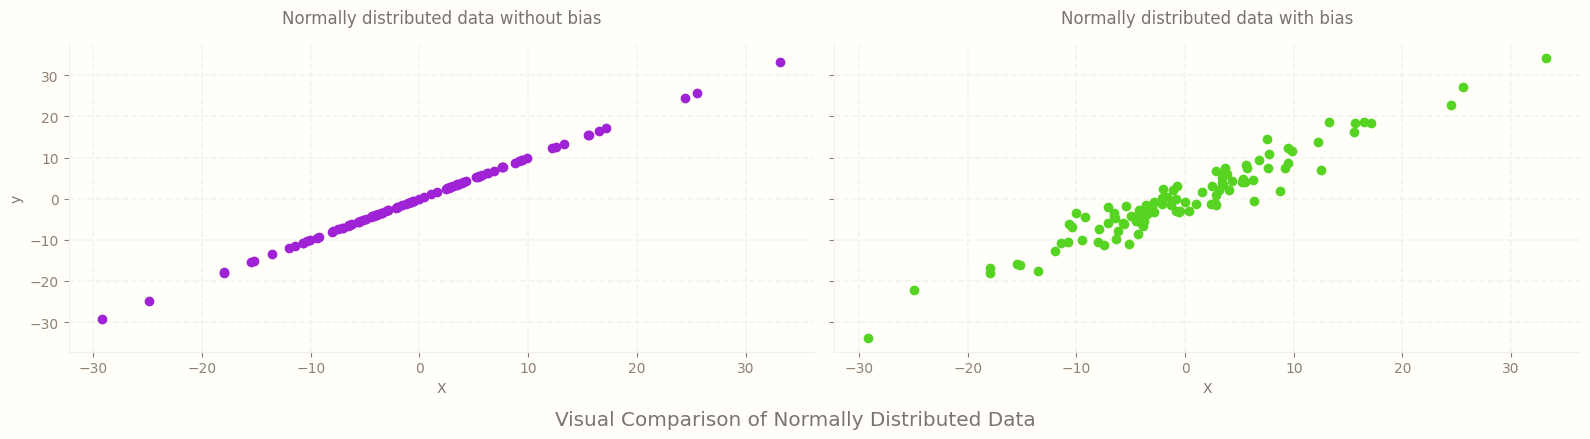

In [19]:
colors = calm_color_generator(2)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

X = torch.randn(100, 1) * 10
y = X
axs[0].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[0].set_title("Normally distributed data without bias",
                 loc="center",
                 pad=15)

y = X + 3 * torch.randn(100, 1)
axs[1].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[1].set_title("Normally distributed data with bias", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle("Visual Comparison of Normally Distributed Data",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [20]:
w, b = model.parameters()
w1 = w[0][0]
b1 = b[0]

tabulation = Form_Generator()
tabulation.heading_printer("Model parameter unpacking")

statements = ["""
w, b = model.parameters()
w1 = w[0][0]
b1 = b[0]
"""]
tabulation.statement_generator(statements)

variables = ["w", "b", "w1", "b1"]
values = [str(w), str(b), str(w1), str(b1)]
tabulation.variable_generator(variables, values)

Model parameter unpacking

    +---------------------------+
    | Statement                 |
    +---------------------------+
    | w, b = model.parameters() |
    | w1 = w[0][0]              |
    | b1 = b[0]                 |
    +---------------------------+
    +----------+--------------------------------------------+
    | Variable | Value                                      |
    +----------+--------------------------------------------+
    | w        | Parameter containing:                      |
    |          | tensor([[0.5153]], requires_grad=True)     |
    | b        | Parameter containing:                      |
    |          | tensor([-0.4414], requires_grad=True)      |
    | w1       | tensor(0.5153, grad_fn=⟨SelectBackward0⟩)  |
    | b1       | tensor(-0.4414, grad_fn=⟨SelectBackward0⟩) |
    +----------+--------------------------------------------+


In [21]:
w1 = w[0][0].item()
b1 = b[0].item()

tabulation = Form_Generator()
tabulation.heading_printer("Value extraction by unpacking model parameters")

statements = ["""
w1 = w[0][0].item()
b1 = b[0].item()
"""]
tabulation.statement_generator(statements)

variables = ["w1", "b1"]
values = [str(w1), str(b1)]
tabulation.variable_generator(variables, values)

Value extraction by unpacking model parameters

    +---------------------+
    | Statement           |
    +---------------------+
    | w1 = w[0][0].item() |
    | b1 = b[0].item()    |
    +---------------------+
    +----------+----------------------+
    | Variable | Value                |
    +----------+----------------------+
    | w1       | 0.5152631998062134   |
    | b1       | -0.44137823581695557 |
    +----------+----------------------+


In [22]:
def get_params():
    return (w[0][0].item(), b[0].item())


def plot_fit(title):
    global colors
    plt.title(label=title)
    w1, b1 = get_params()
    X1 = np.array([-30, 30])
    y1 = w1 * X1 + b1
    plt.plot(X1, y1, c=colors.pop(0))
    plt.scatter(X, y, c=colors.pop(0))


tabulation = Form_Generator()
tabulation.heading_printer("Definition of visualization function")

definitions = [
    """
def get_params():
    return (w[0][0].item(), b[0].item())


def plot_fit(title):
    global colors
    plt.title(label=title)
    w1, b1 = get_params()
    X1 = np.array([-30, 30])
    y1 = w1 * X1 + b1
    plt.plot(X1, y1, c=colors.pop(0))
    plt.scatter(X, y, c=colors.pop(0))
"""
]
tabulation.definition_generator(definitions)

Definition of visualization function

    +------------------------------------------+
    | Definition                               |
    +------------------------------------------+
    | def get_params():                        |
    |     return (w[0][0].item(), b[0].item()) |
    |                                          |
    |                                          |
    | def plot_fit(title):                     |
    |     global colors                        |
    |     plt.title(label=title)               |
    |     w1, b1 = get_params()                |
    |     X1 = np.array([-30, 30])             |
    |     y1 = w1 * X1 + b1                    |
    |     plt.plot(X1, y1, c=colors.pop(0))    |
    |     plt.scatter(X, y, c=colors.pop(0))   |
    +------------------------------------------+


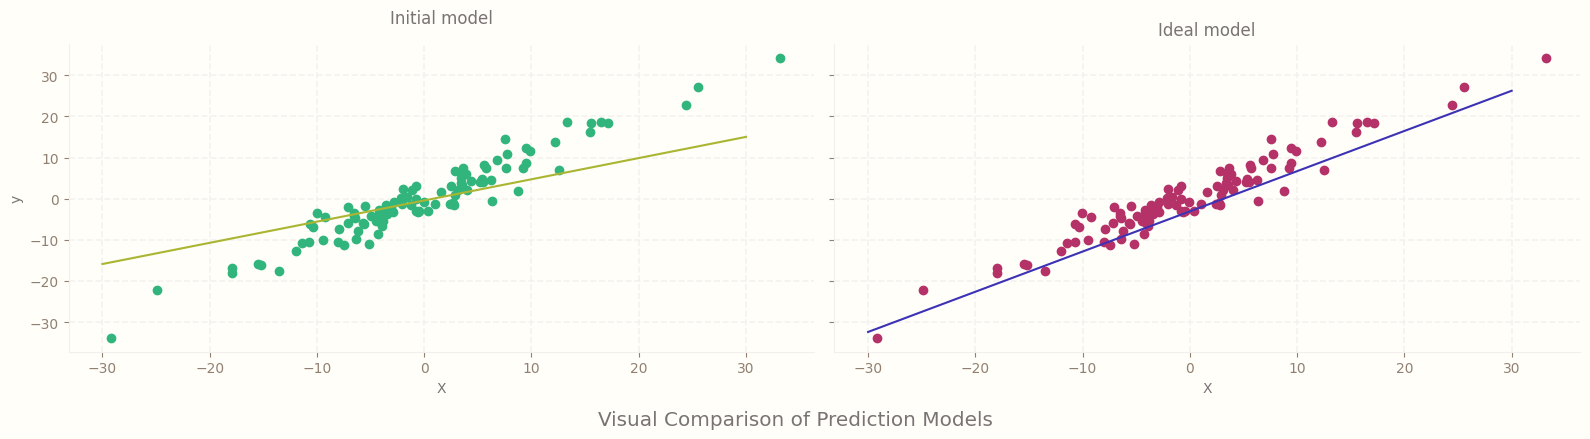

In [23]:
colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

plt.subplot(1, 2, 1)
plot_fit("Initial model")
plt.title(axs[0].get_title(), loc="center", pad=15)

plt.subplot(1, 2, 2)
X1 = np.array([-30, 30])
y1 = X1 + 3 * np.random.randn(2)
plt.plot(X1, y1, c=colors.pop(0))
plt.scatter(X, y, c=colors.pop(0))
plt.title(label="Ideal model")

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle("Visual Comparison of Prediction Models",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Training - Code Implementation

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Specific configuration settings for the training process")

statements = [
    """
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Specific configuration settings for the training process

    +----------------------------------------------------------+
    | Statement                                                |
    +----------------------------------------------------------+
    | criterion = nn.MSELoss()                                 |
    | optimizer = torch.optim.SGD(model.parameters(), lr=0.01) |
    +----------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | MSELoss()                 |
    | optimizer | SGD (                     |
    |           | Parameter Group 0         |
    |           |     dampening: 0          |
    |           |     differentiable: False |
    |           |     foreach: None         |
    |           |     lr: 0.01              |
    |           |     maximize: False       |
    |           |     momentum: 0           |


In [25]:
epochs = 100
losses = []

dataframe = DataFrame_Generator("epoch", "loss", "w", "b")

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    dataframe.updater(i + 1, loss.item(),
                      list(model.parameters())[0][0][0].item(),
                      list(model.parameters())[1][0].item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tabulation = Form_Generator()
tabulation.heading_printer("Model training for a specific number of epochs")

statements = """
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
"""
statements = [statements]
tabulation.statement_generator(statements)

variables = ["X"]
values = [str(reprlib_rules.repr(losses))]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Model training for a specific number of epochs

    +---------------------------------+
    | Statement                       |
    +---------------------------------+
    | epochs = 100                    |
    | losses = []                     |
    |                                 |
    | for i in range(epochs):         |
    |     y_pred = model.forward(X)   |
    |     loss = criterion(y_pred, y) |
    |     losses.append(loss.item())  |
    |     optimizer.zero_grad()       |
    |     loss.backward()             |
    |     optimizer.step()            |
    +---------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | X        | [31.370759963989258, 26.575855255126953,     |
    |          |  22.768278121948242, 19.744253158569336,     |
    |          |  17.342121124267578, 15.43355941772461, ...] |
    +---

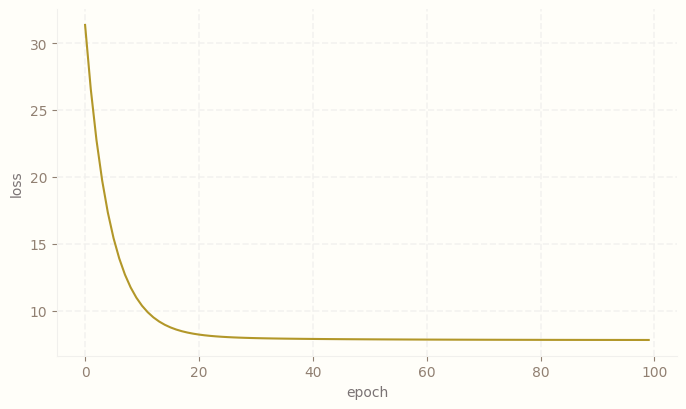

In [26]:
colors = calm_color_generator(1)
plt.rcParams["figure.figsize"] = (figure_size[0] / 2, figure_size[1] / 2)

plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel("loss")
plt.xlabel("epoch")

plt.show()

Text(0.5, 0, 'Epoch')

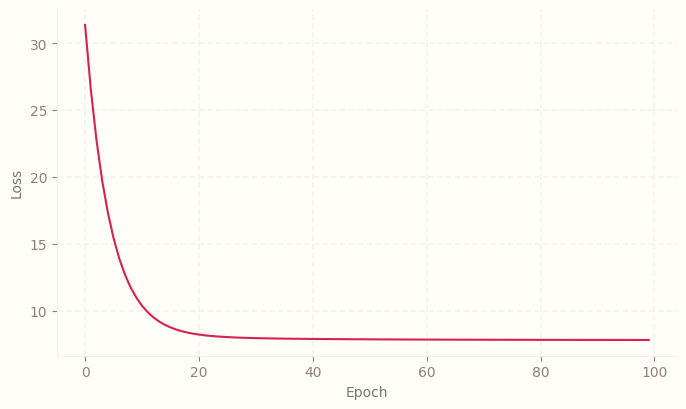

In [27]:
colors = calm_color_generator(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [52]:
def loss_value_calculator(criterion=nn.MSELoss(), s=torch.optim.SGD, lr=0.01, epochs=100):
    criterion = criterion
    optimizer = s(model.parameters(), lr)

    epochs = epochs
    losses = []

    for i in range(epochs):
        y_pred = model.forward(X)
        loss = criterion(y_pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses


loss_value_calculator(lr=0.001)

[7.814383506774902,
 7.8143839836120605,
 7.814383506774902,
 7.814383029937744,
 7.814383029937744,
 7.814383029937744,
 7.814382553100586,
 7.8143815994262695,
 7.8143815994262695,
 7.8143815994262695,
 7.8143815994262695,
 7.814381122589111,
 7.814381122589111,
 7.814381122589111,
 7.814379692077637,
 7.814380645751953,
 7.814379692077637,
 7.8143792152404785,
 7.8143792152404785,
 7.814379692077637,
 7.81437873840332,
 7.81437873840332,
 7.8143792152404785,
 7.814377307891846,
 7.81437873840332,
 7.814378261566162,
 7.814377307891846,
 7.814377307891846,
 7.814377307891846,
 7.8143768310546875,
 7.814377307891846,
 7.8143768310546875,
 7.8143768310546875,
 7.8143768310546875,
 7.814375400543213,
 7.814376354217529,
 7.814374923706055,
 7.814375400543213,
 7.814376354217529,
 7.8143744468688965,
 7.814374923706055,
 7.814374923706055,
 7.8143744468688965,
 7.8143744468688965,
 7.814373970031738,
 7.814373970031738,
 7.814373970031738,
 7.814373970031738,
 7.814373970031738,
 7.81437

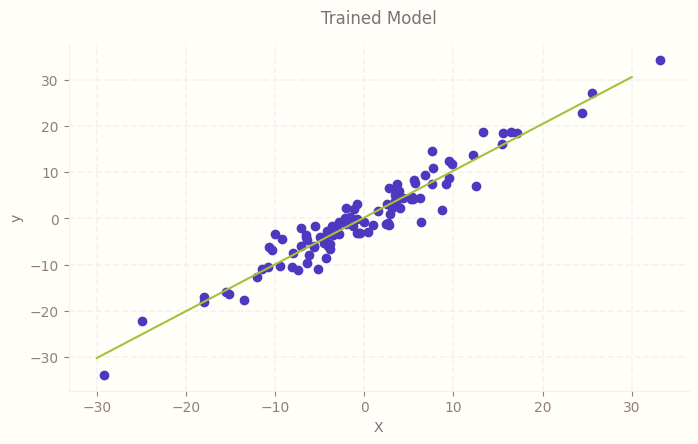

In [30]:
colors = calm_color_generator(2)
plt.rcParams["figure.figsize"] = (figure_size[0] / 2, figure_size[1] / 2)

plot_fit("Trained Model")
plt.title(plt.gca().get_title(), loc="center", pad=15)

plt.xlabel("X")
plt.ylabel("y")

plt.show()

In [31]:
w, b = model.parameters()

w
b

Parameter containing:
tensor([0.1892], requires_grad=True)

In [32]:
print(str(forward(x)).replace("<", "⟨").replace(">", "⟩"))

tensor([[1.2010],
        [2.2129]], grad_fn=⟨AddBackward0⟩)


In [33]:
print(str(type(x)).replace("<", "⟨").replace(">", "⟩"))

⟨class 'torch.Tensor'⟩


In [34]:
print(str(type(x)).replace("<", "⟨").replace(">", "⟩"))

⟨class 'torch.Tensor'⟩


In [35]:
len("⟨a, b⟩")

6

In [36]:
if "<" == "⟨":
    print("yes")
else:
    print("no")

no


In [37]:
tabulation = Form_Generator()
tabulation.heading_printer("")

statement = "-" * 15 + " " + "-" * 30 + " " + "h" * 38
tabulation.statement_generator([statement])



    +------------------------------------------------+
    | Statement                                      |
    +------------------------------------------------+
    | --------------- ------------------------------ |
    |     hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh     |
    +------------------------------------------------+


In [38]:
statement = "-" * 6 + " " + "-" * 6 + " " + "h" * 55
tabulation.statement_generator([statement])

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | ------ ------                                               |
    |     hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh |
    +-------------------------------------------------------------+


In [39]:
"-----------------------------------------------------------".find(' ')

-1

In [40]:
len("-----------------------------------------------------------"[:None])

59

In [41]:
'------------------------------------------------------------ '.rfind(" ")

60

In [42]:
'------------------------------------------------------------ '.find(' ')

60

In [43]:
len('------------------------------------------------------------ '[:])

61